Pairwise Sequence Identity Matrix:
	O00175/1-119	O00585/1-134	O00626/1-93	O15444/1-150	O15467/1-120	P10147/1-92	P13236/1-92	P13500/1-99	P13501/1-91	P16619/1-93	P22362/1-96	P51671/1-97	P55773/1-120	P55774/1-89	P78556/1-96	P80075/1-99	P80098/1-99	Q16627/1-93	Q16663/1-113	Q8NHW4/1-92	Q92583/1-94	Q99616/1-98	Q99731/1-98	Q9NRJ3/1-127	Q9Y258/1-94	Q9Y4X3/1-112
O00175/1-119 100.00	23.93	27.27	20.87	22.61	33.33	28.09	28.12	21.35	32.22	29.79	31.58	22.68	32.18	20.21	32.29	31.25	25.84	30.77	29.21	25.00	32.63	26.04	21.93	33.70	13.89
O00585/1-134 23.93	100.00	26.14	24.43	23.89	25.84	28.41	32.63	22.73	28.09	22.58	32.63	21.88	29.55	24.47	32.63	31.58	22.73	27.78	28.41	23.08	29.79	32.99	16.94	24.18	16.82
O00626/1-93 27.27	26.14	100.00	18.60	21.98	26.97	27.78	24.44	25.84	24.44	23.60	27.27	18.48	27.91	19.32	24.44	28.89	23.08	25.00	27.78	26.97	28.89	25.88	20.00	28.09	19.10
O15444/1-150 20.87	24.43	18.60	100.00	22.52	22.99	23.26	24.73	27.91	19.54	25.27	25.81	20.21	24.14	23.91	24.73	24.73	18.60	22.73	23.26	2

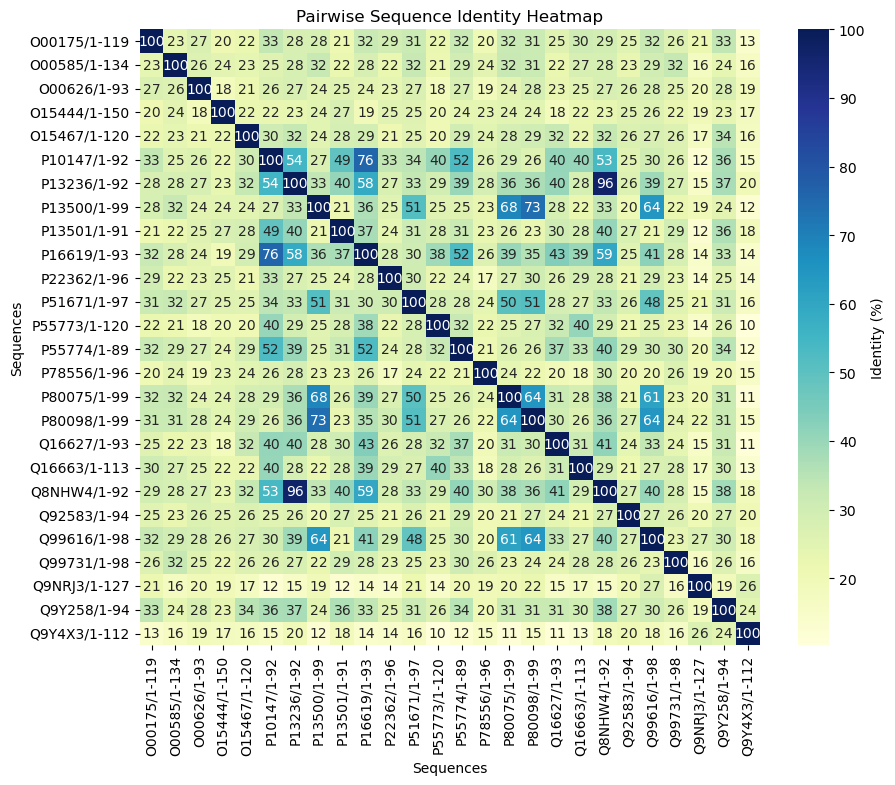

Total area under the density curve: 1.0000


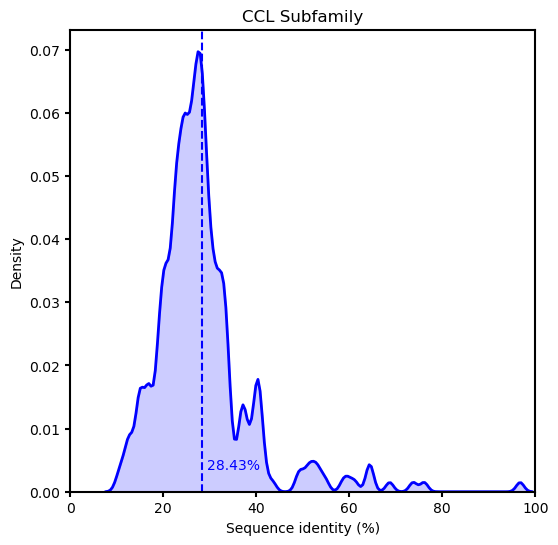

In [2]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_identity(seq1, seq2):
    """Calculates the percentage of identical positions between two sequences, ignoring gaps."""
    matches = 0
    valid_positions = 0
    
    for res1, res2 in zip(seq1, seq2):
        if res1 != "-" and res2 != "-":
            valid_positions += 1
            if res1 == res2:
                matches += 1
    
    identity = (matches / valid_positions) * 100 if valid_positions > 0 else 0
    return identity

def pairwise_sequence_identity(alignment_file):
    # Read alignment from the FASTA file
    alignment = AlignIO.read(alignment_file, "fasta")
    num_sequences = len(alignment)
    
    # Initialize an identity matrix
    identity_matrix = np.zeros((num_sequences, num_sequences))
    
    # Compute pairwise sequence identity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = calculate_identity(alignment[i].seq, alignment[j].seq)
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity  # Symmetric matrix
    
    return identity_matrix, [record.id for record in alignment]

def plot_heatmap(identity_matrix, sequence_ids):
    """Plots a heatmap of the identity matrix."""
    plt.figure(figsize=(10, 8))

    # Create a heatmap
    heatmap = sns.heatmap(identity_matrix, annot=True, cmap="YlGnBu", 
                           xticklabels=sequence_ids, yticklabels=sequence_ids,
                           cbar_kws={"label": "Identity (%)"},
                           fmt="g")  # Use fmt="g" for general format
    
    for text in heatmap.texts:
        text.set_text(int(float(text.get_text())))  # Convert to int for annotations

    plt.title("Pairwise Sequence Identity Heatmap")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.show()

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_identity_distribution(identity_matrix, bw_adjust=0.25):
    """Plots the distribution of pairwise identities as a KDE with shaded area under the line, with reduced smoothing."""
    # Extract valid pairwise identities (excluding self-comparisons)
    valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
    
    # Calculate average and lowest identity
    average_identity = np.average(valid_identities)
    lowest_identity = np.min(valid_identities)

    plt.figure(figsize=(6, 6))
    
    # Plot the KDE density curve with reduced smoothing, clipped to start from the lowest identity
    kde_color = 'blue'
    kde = sns.kdeplot(valid_identities, color=kde_color, linewidth=2, bw_adjust=bw_adjust)
    
    # Get the data points of the kde line for shading under it
    kde_x, kde_y = kde.get_lines()[0].get_data()
    plt.fill_between(kde_x, kde_y, color=kde_color, alpha=0.2)

    # Calculate and print the total area under the KDE density curve
    total_area = np.trapz(kde_y, kde_x)
    print(f"Total area under the density curve: {total_area:.4f}")
    
    # Add dashed lines for average and lowest identity, both in the same color as the KDE line
    plt.axvline(average_identity, color=kde_color, linestyle='--', label=f'Average Identity: {average_identity:.2f}%')
    #plt.axvline(lowest_identity, color=kde_color, linestyle='--', label=f'Lowest Identity: {lowest_identity:.2f}%')

    # Annotate the average and lowest identity lines
    plt.text(average_identity + 1, max(kde_y) * 0.05, f'{average_identity:.2f}%', color=kde_color)
    #plt.text(lowest_identity + 1, max(kde_y) * 0.05, f'{lowest_identity:.2f}%', color=kde_color)

    plt.title("CCL Subfamily")
    plt.xlabel("Sequence identity (%)")
    plt.ylabel("Density")
    plt.xlim(0, 100)
    #plt.legend()
    plt.grid(False)
    
    # Make the box (axes) lines thicker
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.tick_params(width=1.5)  # Make tick marks thicker

    plt.show()




# Define input file path
alignment_file = "chemopar-db_CC_MSA.fa"

# Calculate pairwise identity matrix
identity_matrix, sequence_ids = pairwise_sequence_identity(alignment_file)

# Print matrix with sequence IDs
print("Pairwise Sequence Identity Matrix:")
print("\t" + "\t".join(sequence_ids))
for i, row in enumerate(identity_matrix):
    print(sequence_ids[i], "\t".join(f"{value:.2f}" for value in row))

# Calculate average and mean identities
valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
average_identity = np.average(valid_identities)

print(f"\nAverage Pairwise Identity (excluding self-comparisons): {average_identity:.2f}%")

# Plot the heatmap
plot_heatmap(identity_matrix, sequence_ids)

# Plot the distribution of identities
plot_identity_distribution(identity_matrix)


In [2]:
import urllib.request
import json

def get_protein_details():
    url = "https://chemopar-db.net/api/protein_details/"

    try:
        with urllib.request.urlopen(url) as response:
            data = json.loads(response.read().decode("utf-8"))
            # Assuming the response contains JSON data, you can use json.loads to access the data

            # Process or save the data as needed
            print("Protein details retrieved:", data)
    except urllib.error.HTTPError as e:
        print("Failed to retrieve protein details. Status code:", e.code)
    except urllib.error.URLError as e:
        print("Error connecting to the server:", e.reason)

# Example usage:
get_protein_details()

Protein details retrieved: [{'chemokine_ID': 1, 'name': '', 'gene_name': 'CXCL11L1_DANRE', 'subfamily': 'CXCL', 'type': 'CXCL11L1', 'species': 'Danio rerio', 'full_name': '', 'uniprot': 'A0A0R4INB9', 'iuphar': '', 'sequence': 'MKTVTALLLVSLAVVAIEGQHMKSQRCVCLGAGLNMVKPVLIEKIEILPSSPSCGHMEVIATLKNGAGKRCLNPKSKFTKKIIDKIEKNNRNAR'}, {'chemokine_ID': 2, 'name': '', 'gene_name': 'CXCL9_BOVIN', 'subfamily': 'CXCL', 'type': 'CXCL9', 'species': 'Bos taurus', 'full_name': '', 'uniprot': 'A9QWP9', 'iuphar': '', 'sequence': 'MKKSAPLFLGIIFLTLTGVQGVPAIRNGRCSCINTSQGMIHPKSLKDLKQFAPSPSCEKTEIIATMKNGNEACLNPDLPEVKELIKEWEKQVNQKKKQRKGKKYKKTKKVPKVKRSQRPSQKKTT'}, {'chemokine_ID': 3, 'name': '', 'gene_name': 'CXCL11_BOVIN', 'subfamily': 'CXCL', 'type': 'CXCL11', 'species': 'Bos taurus', 'full_name': '', 'uniprot': 'A9QWQ1', 'iuphar': '', 'sequence': 'MSVKGMAIVLTVILCAAIVQGFPMFKGGRCLCIGPGVKAVKVADIEKVSIIYPTNNCDKTEVIITLKTHKGQRCLNPKAKQAKAIIKKVQRKNSEKYKNI'}, {'chemokine_ID': 4, 'name': '', 'gene_name': 'CXCL11L6_DANRE', '

Pairwise Sequence Identity Matrix:
	O14625/1-94	O43927/1-109	O95715/1-111	P02775/1-128	P02776/1-101	P02778/1-98	P09341/1-107	P10145/1-99	P10720/1-104	P19875/1-107	P19876/1-107	P42830/1-114	P48061/1-93	P80162/1-114	Q07325/1-125
O14625/1-94 100.00	18.28	22.58	19.57	21.11	30.85	25.00	20.43	21.11	26.09	26.09	19.57	26.37	21.74	33.33
O43927/1-109 18.28	100.00	12.75	20.41	22.58	22.68	21.65	28.57	21.51	22.68	22.68	21.43	22.83	23.47	16.82
O95715/1-111 22.58	12.75	100.00	22.55	21.65	20.62	19.80	18.37	20.62	20.79	18.81	19.61	17.20	21.57	25.00
P02775/1-128 19.57	20.41	22.55	100.00	36.63	25.26	41.12	36.73	33.65	39.25	36.45	33.33	19.57	29.82	23.96
P02776/1-101 21.11	22.58	21.65	36.63	100.00	24.44	37.62	28.72	82.18	34.65	33.66	36.63	22.73	35.64	26.37
P02778/1-98 30.85	22.68	20.62	25.26	24.44	100.00	22.34	18.95	24.44	24.47	21.28	22.11	25.81	26.32	36.08
P09341/1-107 25.00	21.65	19.80	41.12	37.62	22.34	100.00	34.69	35.92	89.72	86.92	40.19	23.91	36.45	33.68
P10145/1-99 20.43	28.57	18.37	36.73	28.72	18.95

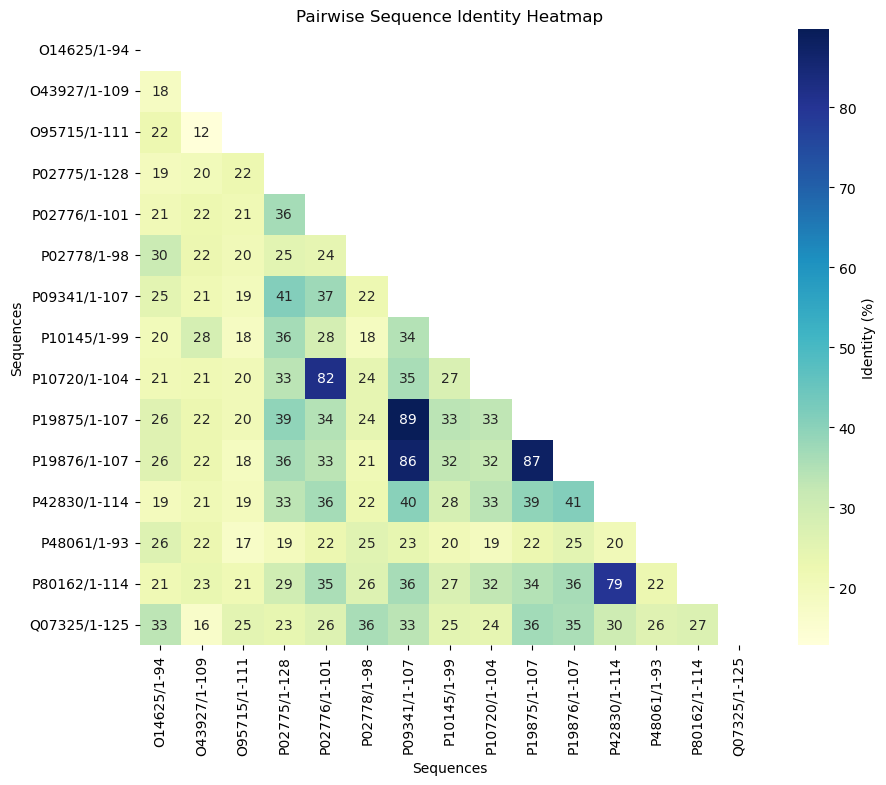

Total area under the density curve: 1.0000


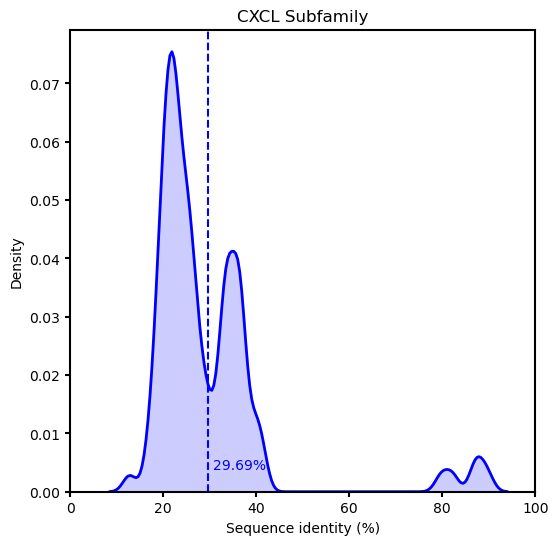

In [2]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_identity(seq1, seq2):
    """Calculates the percentage of identical positions between two sequences, ignoring gaps."""
    matches = 0
    valid_positions = 0
    
    for res1, res2 in zip(seq1, seq2):
        if res1 != "-" and res2 != "-":
            valid_positions += 1
            if res1 == res2:
                matches += 1
    
    identity = (matches / valid_positions) * 100 if valid_positions > 0 else 0
    return identity

def pairwise_sequence_identity(alignment_file):
    # Read alignment from the FASTA file
    alignment = AlignIO.read(alignment_file, "fasta")
    num_sequences = len(alignment)
    
    # Initialize an identity matrix
    identity_matrix = np.zeros((num_sequences, num_sequences))
    
    # Compute pairwise sequence identity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = calculate_identity(alignment[i].seq, alignment[j].seq)
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity  # Symmetric matrix
    
    return identity_matrix, [record.id for record in alignment]

def plot_heatmap(identity_matrix, sequence_ids):
    """Plots a heatmap of the identity matrix with the top-right triangle hidden."""
    plt.figure(figsize=(10, 8))
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(identity_matrix, dtype=bool))

    # Create a heatmap with the mask applied
    heatmap = sns.heatmap(identity_matrix, annot=True, cmap="YlGnBu", 
                          xticklabels=sequence_ids, yticklabels=sequence_ids,
                          cbar_kws={"label": "Identity (%)"},
                          fmt="g", mask=mask)  # Apply the mask

    for text in heatmap.texts:
        text.set_text(int(float(text.get_text())))  # Convert to int for annotations

    plt.title("Pairwise Sequence Identity Heatmap")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.show()


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_identity_distribution(identity_matrix, bw_adjust=0.25):
    """Plots the distribution of pairwise identities as a KDE with shaded area under the line, with reduced smoothing."""
    # Extract valid pairwise identities (excluding self-comparisons)
    valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
    
    # Calculate average and lowest identity
    average_identity = np.average(valid_identities)
    lowest_identity = np.min(valid_identities)

    plt.figure(figsize=(6, 6))
    
    # Plot the KDE density curve with reduced smoothing, clipped to start from the lowest identity
    kde_color = 'blue'
    kde = sns.kdeplot(valid_identities, color=kde_color, linewidth=2, bw_adjust=bw_adjust)
    
    # Get the data points of the kde line for shading under it
    kde_x, kde_y = kde.get_lines()[0].get_data()
    plt.fill_between(kde_x, kde_y, color=kde_color, alpha=0.2)

    # Calculate and print the total area under the KDE density curve
    total_area = np.trapz(kde_y, kde_x)
    print(f"Total area under the density curve: {total_area:.4f}")
    
    # Add dashed lines for average and lowest identity, both in the same color as the KDE line
    plt.axvline(average_identity, color=kde_color, linestyle='--', label=f'Average Identity: {average_identity:.2f}%')
    #plt.axvline(lowest_identity, color=kde_color, linestyle='--', label=f'Lowest Identity: {lowest_identity:.2f}%')

    # Annotate the average and lowest identity lines
    plt.text(average_identity + 1, max(kde_y) * 0.05, f'{average_identity:.2f}%', color=kde_color)
    #plt.text(lowest_identity + 1, max(kde_y) * 0.05, f'{lowest_identity:.2f}%', color=kde_color)

    plt.title("CXCL Subfamily")
    plt.xlabel("Sequence identity (%)")
    plt.ylabel("Density")
    plt.xlim(0, 100)
    #plt.legend()
    plt.grid(False)
    
    # Make the box (axes) lines thicker
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.tick_params(width=1.5)  # Make tick marks thicker

    plt.show()




# Define input file path
alignment_file = "chemopar-db_CXC_MSA.fa"

# Calculate pairwise identity matrix
identity_matrix, sequence_ids = pairwise_sequence_identity(alignment_file)

# Print matrix with sequence IDs
print("Pairwise Sequence Identity Matrix:")
print("\t" + "\t".join(sequence_ids))
for i, row in enumerate(identity_matrix):
    print(sequence_ids[i], "\t".join(f"{value:.2f}" for value in row))

# Calculate average and mean identities
valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
average_identity = np.average(valid_identities)

print(f"\nAverage Pairwise Identity (excluding self-comparisons): {average_identity:.2f}%")

# Plot the heatmap
plot_heatmap(identity_matrix, sequence_ids)

# Plot the distribution of identities
plot_identity_distribution(identity_matrix)


Pairwise Sequence Identity Matrix:
	O14625/1-94	O43927/1-109	O95715/1-111	P02775/1-128	P02776/1-101	P02778/1-98	P09341/1-107	P10145/1-99	P10720/1-104	P19875/1-107	P19876/1-107	P42830/1-114	P48061/1-93	P80162/1-114	Q07325/1-125	O00175/1-119	O00585/1-134	O00626/1-93	O15444/1-150	O15467/1-120	P10147/1-92	P13236/1-92	P13500/1-99	P13501/1-91	P16619/1-93	P22362/1-96	P51671/1-97	P55773/1-120	P55774/1-89	P78556/1-96	P80075/1-99	P80098/1-99	Q16627/1-93	Q16663/1-113	Q8NHW4/1-92	Q92583/1-94	Q99616/1-98	Q99731/1-98	Q9NRJ3/1-127	Q9Y258/1-94	Q9Y4X3/1-112
O14625/1-94 100.00	18.28	22.58	19.57	21.11	30.85	25.00	20.43	21.11	26.09	26.09	19.57	26.37	21.74	33.33	17.78	9.89	9.30	21.11	13.48	15.73	12.50	15.38	21.59	13.48	14.44	17.58	17.78	21.35	19.57	16.48	17.58	14.77	14.44	12.50	10.00	18.89	16.48	18.89	14.44	14.29
O43927/1-109 18.28	100.00	12.75	20.41	22.58	22.68	21.65	28.57	21.51	22.68	22.68	21.43	22.83	23.47	16.82	21.70	19.05	17.98	18.45	20.95	25.00	21.98	16.33	17.58	22.83	23.96	26.80	16.16	21.35	23.96	18

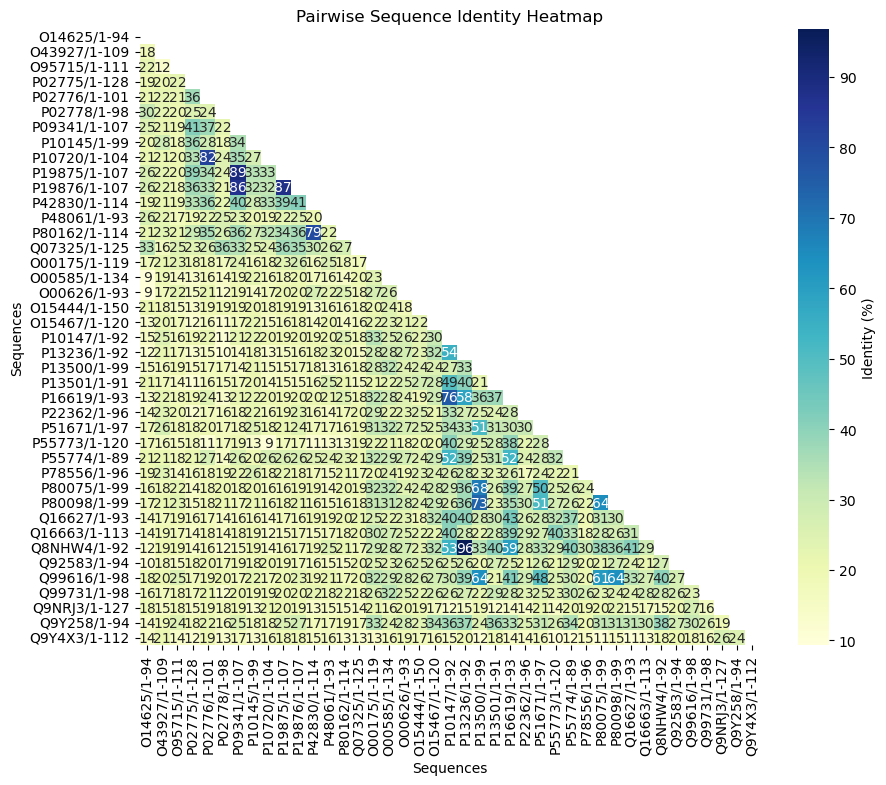

Total area under the density curve: 1.0000


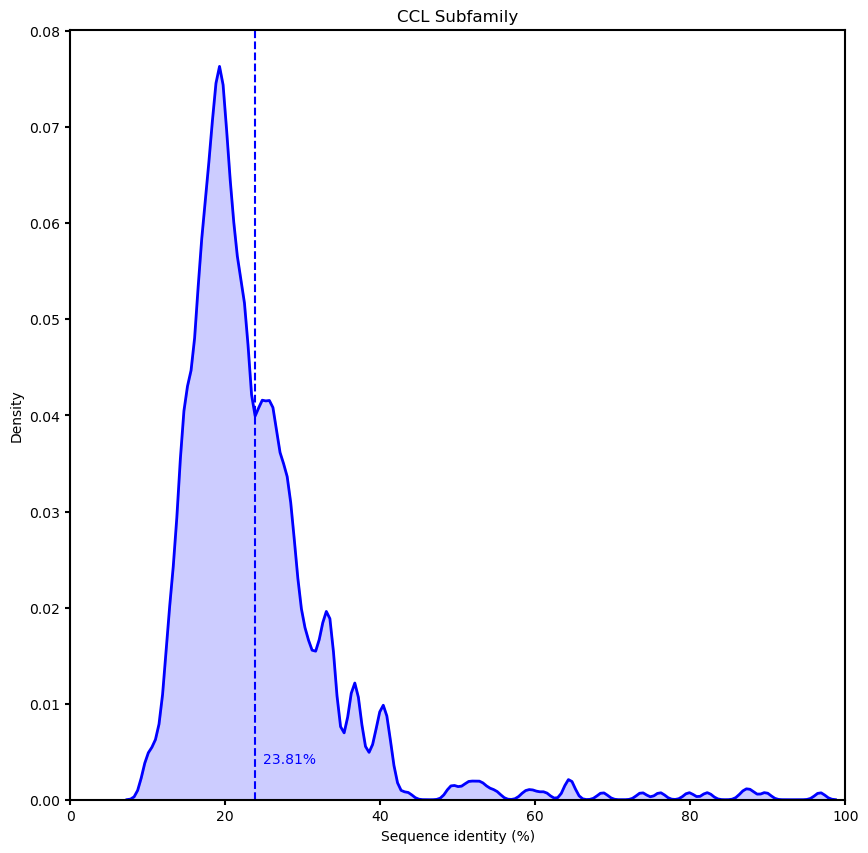


Sequence with the Highest Average Identity: P16619/1-93
Average Identity: 29.99%

Sequence with the Lowest Average Identity: Q9Y4X3/1-112
Average Identity: 16.32%


In [ ]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_identity(seq1, seq2):
    """Calculates the percentage of identical positions between two sequences, ignoring gaps."""
    matches = 0
    valid_positions = 0
    
    for res1, res2 in zip(seq1, seq2):
        if res1 != "-" and res2 != "-":
            valid_positions += 1
            if res1 == res2:
                matches += 1
    
    identity = (matches / valid_positions) * 100 if valid_positions > 0 else 0
    return identity

def pairwise_sequence_identity(alignment_file):
    # Read alignment from the FASTA file
    alignment = AlignIO.read(alignment_file, "fasta")
    num_sequences = len(alignment)
    
    # Initialize an identity matrix
    identity_matrix = np.zeros((num_sequences, num_sequences))
    
    # Compute pairwise sequence identity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = calculate_identity(alignment[i].seq, alignment[j].seq)
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity  # Symmetric matrix
    
    return identity_matrix, [record.id for record in alignment]

def plot_heatmap(identity_matrix, sequence_ids):
    """Plots a heatmap of the identity matrix with the top-right triangle hidden."""
    plt.figure(figsize=(10, 8))
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(identity_matrix, dtype=bool))

    # Create a heatmap with the mask applied
    heatmap = sns.heatmap(identity_matrix, annot=True, cmap="YlGnBu", 
                          xticklabels=sequence_ids, yticklabels=sequence_ids,
                          cbar_kws={"label": "Identity (%)"},
                          fmt="g", mask=mask)  # Apply the mask

    for text in heatmap.texts:
        text.set_text(int(float(text.get_text())))  # Convert to int for annotations

    plt.title("Pairwise Sequence Identity Heatmap")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.show()



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_identity_distribution(identity_matrix, bw_adjust=0.25):
    """Plots the distribution of pairwise identities as a KDE with shaded area under the line, with reduced smoothing."""
    # Extract valid pairwise identities (excluding self-comparisons)
    valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
    
    # Calculate average and lowest identity
    average_identity = np.average(valid_identities)
    lowest_identity = np.min(valid_identities)

    plt.figure(figsize=(10, 10))
    
    # Plot the KDE density curve with reduced smoothing, clipped to start from the lowest identity
    kde_color = 'blue'
    kde = sns.kdeplot(valid_identities, color=kde_color, linewidth=2, bw_adjust=bw_adjust)
    
    # Get the data points of the kde line for shading under it
    kde_x, kde_y = kde.get_lines()[0].get_data()
    plt.fill_between(kde_x, kde_y, color=kde_color, alpha=0.2)

    # Calculate and print the total area under the KDE density curve
    total_area = np.trapz(kde_y, kde_x)
    print(f"Total area under the density curve: {total_area:.4f}")
    
    # Add dashed lines for average and lowest identity, both in the same color as the KDE line
    plt.axvline(average_identity, color=kde_color, linestyle='--', label=f'Average Identity: {average_identity:.2f}%')
    #plt.axvline(lowest_identity, color=kde_color, linestyle='--', label=f'Lowest Identity: {lowest_identity:.2f}%')

    # Annotate the average and lowest identity lines
    plt.text(average_identity + 1, max(kde_y) * 0.05, f'{average_identity:.2f}%', color=kde_color)
    #plt.text(lowest_identity + 1, max(kde_y) * 0.05, f'{lowest_identity:.2f}%', color=kde_color)

    plt.title("CCL Subfamily")
    plt.xlabel("Sequence identity (%)")
    plt.ylabel("Density")
    plt.xlim(0, 100)
    #plt.legend()
    plt.grid(False)
    
    # Make the box (axes) lines thicker
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.tick_params(width=1.5)  # Make tick marks thicker

    plt.show()



# Define input file path
alignment_file = "chemopar-db_human_MSA.fa"

# Calculate pairwise identity matrix
identity_matrix, sequence_ids = pairwise_sequence_identity(alignment_file)

# Print matrix with sequence IDs
print("Pairwise Sequence Identity Matrix:")
print("\t" + "\t".join(sequence_ids))
for i, row in enumerate(identity_matrix):
    print(sequence_ids[i], "\t".join(f"{value:.2f}" for value in row))

# Calculate average and mean identities
valid_identities = identity_matrix[np.triu_indices(len(identity_matrix), k=1)]
average_identity = np.average(valid_identities)

print(f"\nAverage Pairwise Identity (excluding self-comparisons): {average_identity:.2f}%")

# Plot the heatmap
plot_heatmap(identity_matrix, sequence_ids)

# Plot the distribution of identities
plot_identity_distribution(identity_matrix)


# Calculate average sequence identity for each sequence (excluding self-comparisons)
average_identities = []
for i in range(len(identity_matrix)):
    # Exclude self-comparisons by averaging only non-diagonal elements
    non_diagonal_values = [identity_matrix[i][j] for j in range(len(identity_matrix)) if i != j]
    avg_identity = np.mean(non_diagonal_values)
    average_identities.append(avg_identity)

# Find the indices of the sequences with the highest and lowest average identities
highest_avg_index = np.argmax(average_identities)
lowest_avg_index = np.argmin(average_identities)

# Print the sequences with the highest and lowest average identities
print(f"\nSequence with the Highest Average Identity: {sequence_ids[highest_avg_index]}")
print(f"Average Identity: {average_identities[highest_avg_index]:.2f}%")

print(f"\nSequence with the Lowest Average Identity: {sequence_ids[lowest_avg_index]}")
print(f"Average Identity: {average_identities[lowest_avg_index]:.2f}%")


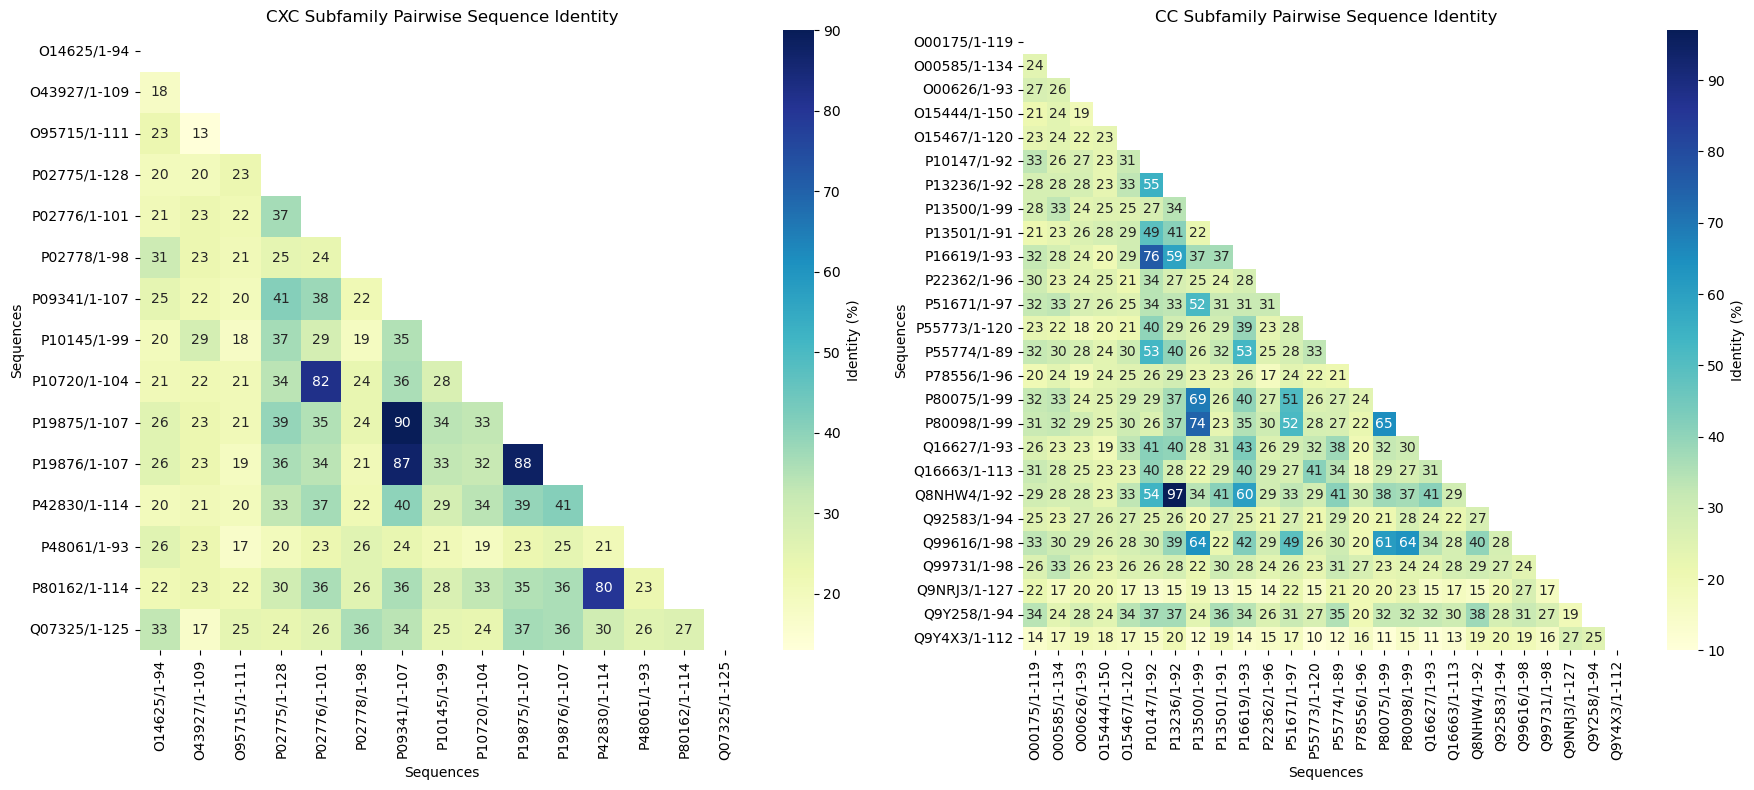

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import AlignIO

def calculate_identity(seq1, seq2):
    """Calculates the percentage of identical positions between two sequences, ignoring gaps."""
    matches = 0
    valid_positions = 0
    
    for res1, res2 in zip(seq1, seq2):
        if res1 != "-" and res2 != "-":
            valid_positions += 1
            if res1 == res2:
                matches += 1
    
    identity = (matches / valid_positions) * 100 if valid_positions > 0 else 0
    return identity

def pairwise_sequence_identity(alignment_file):
    # Read alignment from the FASTA file
    alignment = AlignIO.read(alignment_file, "fasta")
    num_sequences = len(alignment)
    
    # Initialize an identity matrix
    identity_matrix = np.zeros((num_sequences, num_sequences))
    
    # Compute pairwise sequence identity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = calculate_identity(alignment[i].seq, alignment[j].seq)
            identity_matrix[i, j] = identity
            identity_matrix[j, i] = identity  # Symmetric matrix
    
    # Round the matrix to integer values
    identity_matrix = np.round(identity_matrix).astype(int)
    
    return identity_matrix, [record.id for record in alignment]

def plot_combined_heatmaps(cxc_identity_matrix, cc_identity_matrix, cxc_ids, cc_ids):
    """Plots a combined figure with heatmaps for CXC and CC subfamilies, with values rounded to whole numbers."""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot CXC heatmap with upper triangle masked and rounded values
    cxc_mask = np.triu(np.ones_like(cxc_identity_matrix, dtype=bool))
    sns.heatmap(cxc_identity_matrix, annot=True, cmap="YlGnBu", 
                xticklabels=cxc_ids, yticklabels=cxc_ids,
                cbar_kws={"label": "Identity (%)"}, fmt="d", mask=cxc_mask, ax=axes[0])
    axes[0].set_title("CXC Subfamily Pairwise Sequence Identity")
    axes[0].set_xlabel("Sequences")
    axes[0].set_ylabel("Sequences")

    # Plot CC heatmap with upper triangle masked and rounded values
    cc_mask = np.triu(np.ones_like(cc_identity_matrix, dtype=bool))
    sns.heatmap(cc_identity_matrix, annot=True, cmap="YlGnBu", 
                xticklabels=cc_ids, yticklabels=cc_ids,
                cbar_kws={"label": "Identity (%)"}, fmt="d", mask=cc_mask, ax=axes[1])
    axes[1].set_title("CC Subfamily Pairwise Sequence Identity")
    axes[1].set_xlabel("Sequences")
    axes[1].set_ylabel("Sequences")

    plt.tight_layout()
    plt.show()

# Define input file paths for CXC and CC subfamilies
cxc_alignment_file = "chemopar-db_CXC_MSA.fa"
cc_alignment_file = "chemopar-db_CC_MSA.fa"

# Calculate pairwise identity matrices
cxc_identity_matrix, cxc_ids = pairwise_sequence_identity(cxc_alignment_file)
cc_identity_matrix, cc_ids = pairwise_sequence_identity(cc_alignment_file)

# Plot both heatmaps in a single figure
plot_combined_heatmaps(cxc_identity_matrix, cc_identity_matrix, cxc_ids, cc_ids)
